## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [2]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('Loan_Modelling.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Overview

* Observations
* Sanity checks

In [3]:
data[data['Personal_Loan'] == 1].head(20)



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
42,43,32,7,132,90019,4,1.1,2,412,1,0,0,1,0
47,48,37,12,194,91380,4,0.2,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.1,3,240,1,0,0,1,0
57,58,56,31,131,95616,2,1.2,3,0,1,0,0,0,0
75,76,31,7,135,94901,4,3.8,2,0,1,0,1,1,1


In [4]:
# prompt: find all the rows with 'Personal_loan' is 1

rows_with_personal_loan = data[data['Personal_Loan'] == 1]
print(rows_with_personal_loan)


        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
9       10   34           9     180    93023       1    8.9          3   
16      17   38          14     130    95010       4    4.7          3   
18      19   46          21     193    91604       2    8.1          3   
29      30   38          13     119    94104       1    3.3          2   
38      39   42          18     141    94114       3    5.0          3   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4883  4884   38          13     129    92646       3    4.1          3   
4927  4928   43          19     121    94720       1    0.7          2   
4941  4942   28           4     112    90049       2    1.6          2   
4962  4963   46          20     122    90065       3    3.0          3   
4980  4981   29           5     135    95762       3    5.3          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
9            0              1         

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
data['Personal_Loan'].unique()

array([0, 1])

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [7]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [9]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [10]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

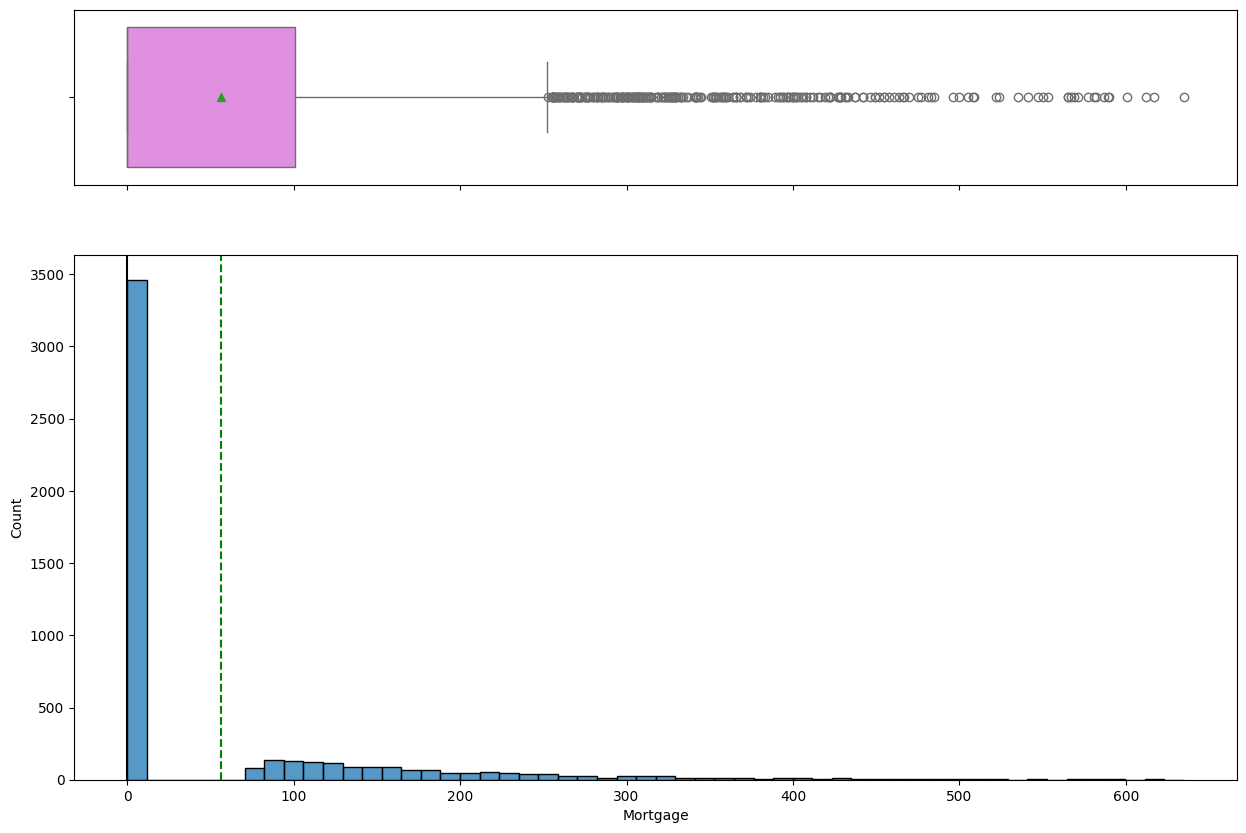

In [11]:
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

histogram_boxplot(data, "Mortgage")

Observations:
1. Majority of the customers have no mortgage, hence lot of outliers
2. Those who have mortgage have a right skewed distribution

In [13]:
#How many customers have credit cards?
data[data['CreditCard']>0]["ID"].count()

1470

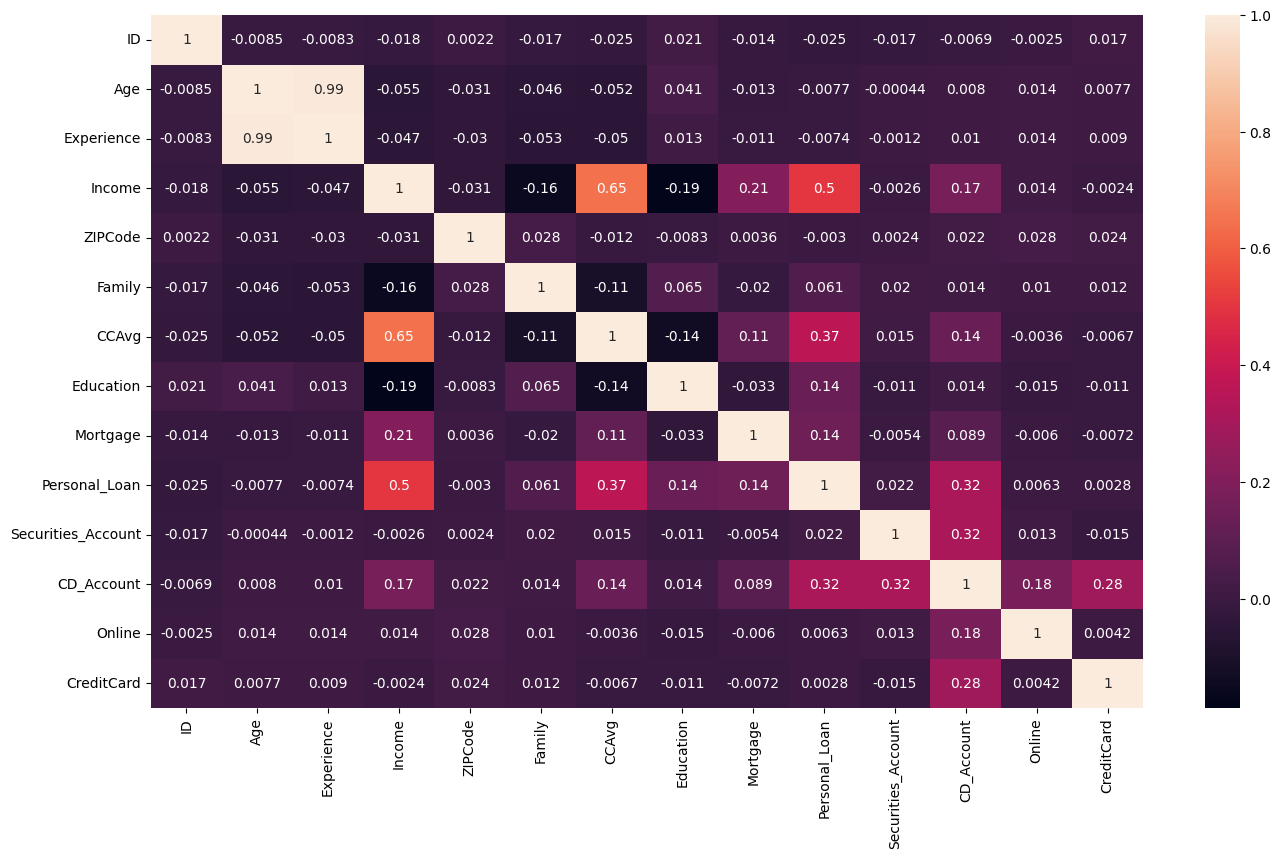

In [14]:
#What are the attributes that have a strong correlation with the target attribute (personal loan)?
corr = data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
plt.show()

Personal load has strong correlation with Income and CCAvg

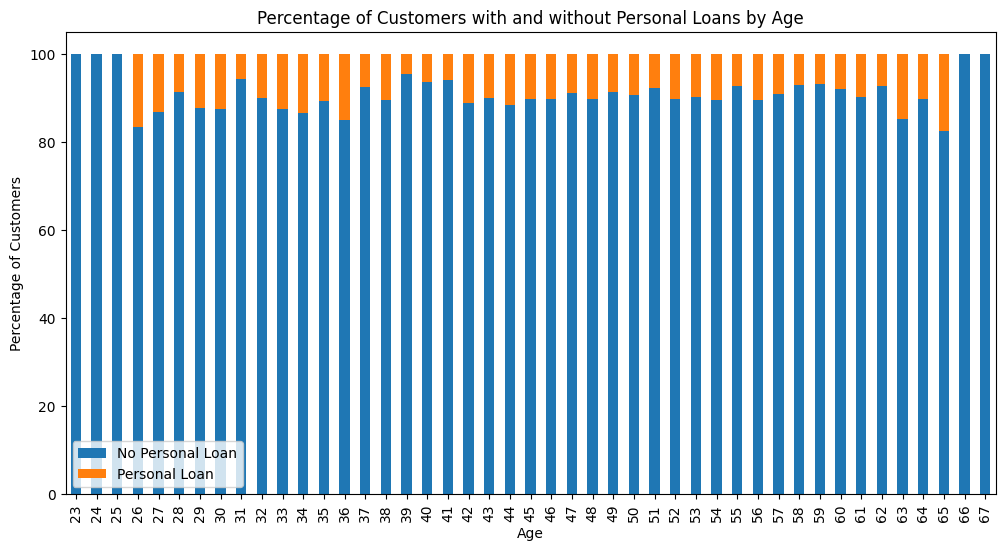

In [15]:
#How does a customer's interest in purchasing a loan vary with their age?

import matplotlib.pyplot as plt
# Group data by age and calculate the percentage of customers with and without personal loans
age_loan_counts = data.groupby(['Age', 'Personal_Loan'])['ID'].count().unstack()
age_loan_percentages = age_loan_counts.div(age_loan_counts.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = age_loan_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Percentage of Customers with and without Personal Loans by Age')
ax.legend(['No Personal Loan', 'Personal Loan'])

plt.show()


Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

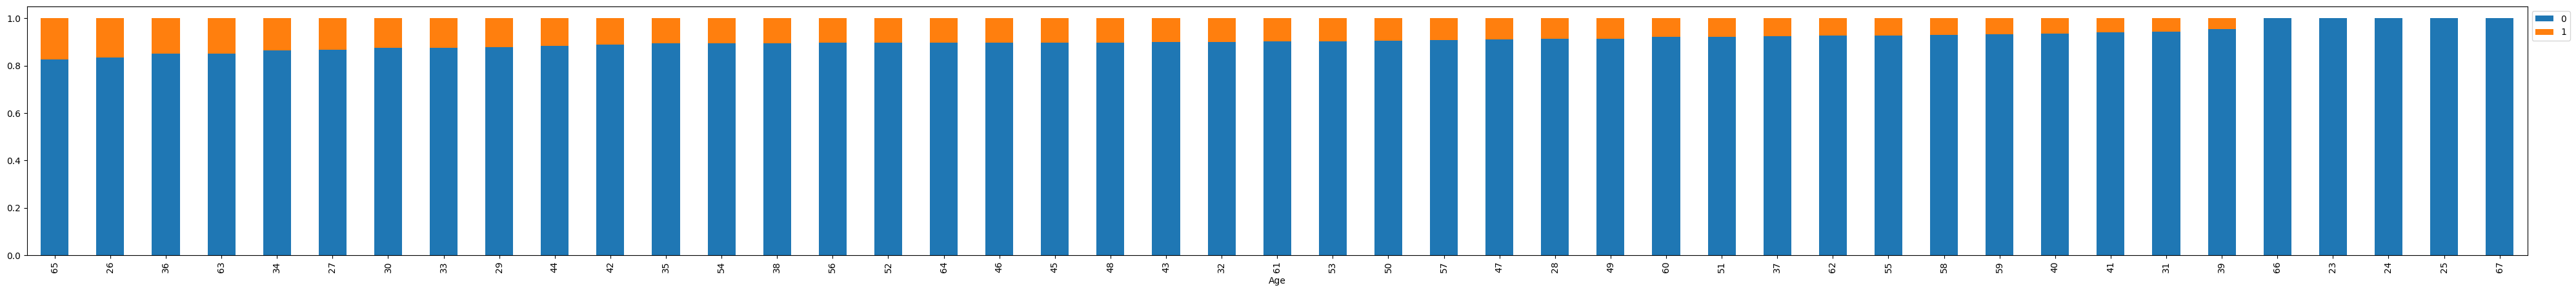

In [16]:
stacked_barplot(data, 'Age', 'Personal_Loan')

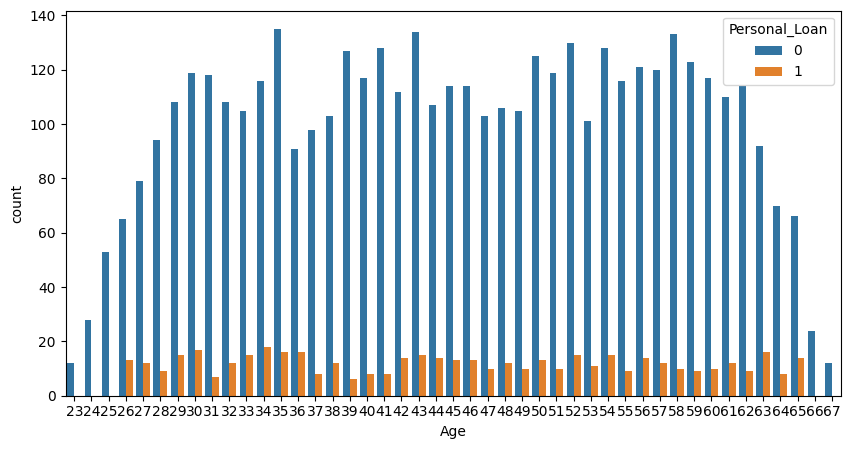

In [17]:

plt.figure(figsize=(10,5))
sns.countplot(data= data,x='Age', hue='Personal_Loan')
plt.show()


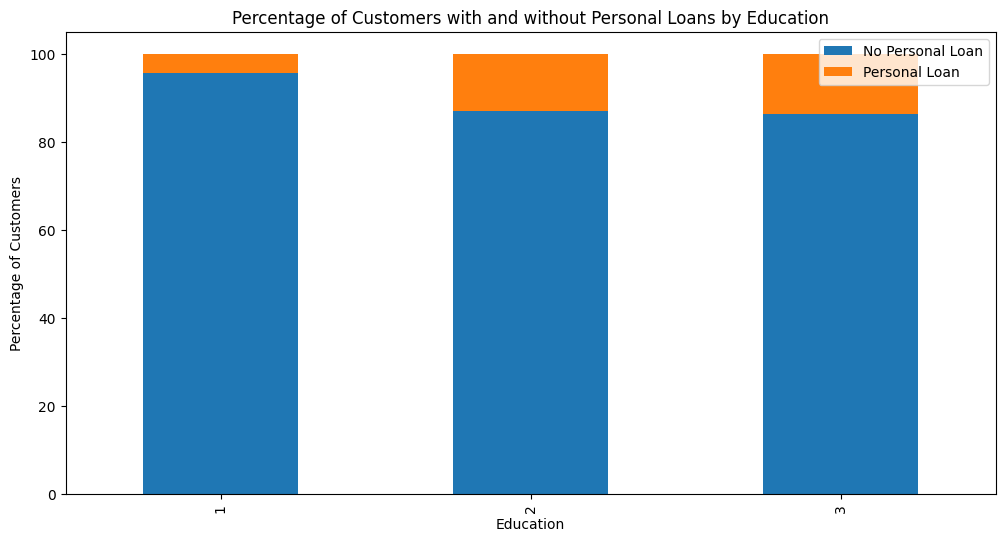

In [19]:
#How does a customer's interest in purchasing a loan vary with their education?

import matplotlib.pyplot as plt
# Group data by age and calculate the percentage of customers with and without personal loans
age_loan_counts = data.groupby(['Education', 'Personal_Loan'])['ID'].count().unstack()
age_loan_percentages = age_loan_counts.div(age_loan_counts.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = age_loan_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Education')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Percentage of Customers with and without Personal Loans by Education')
ax.legend(['No Personal Loan', 'Personal Loan'])

plt.show()

A customer with higher education has greater interest in purchasing a loan


Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

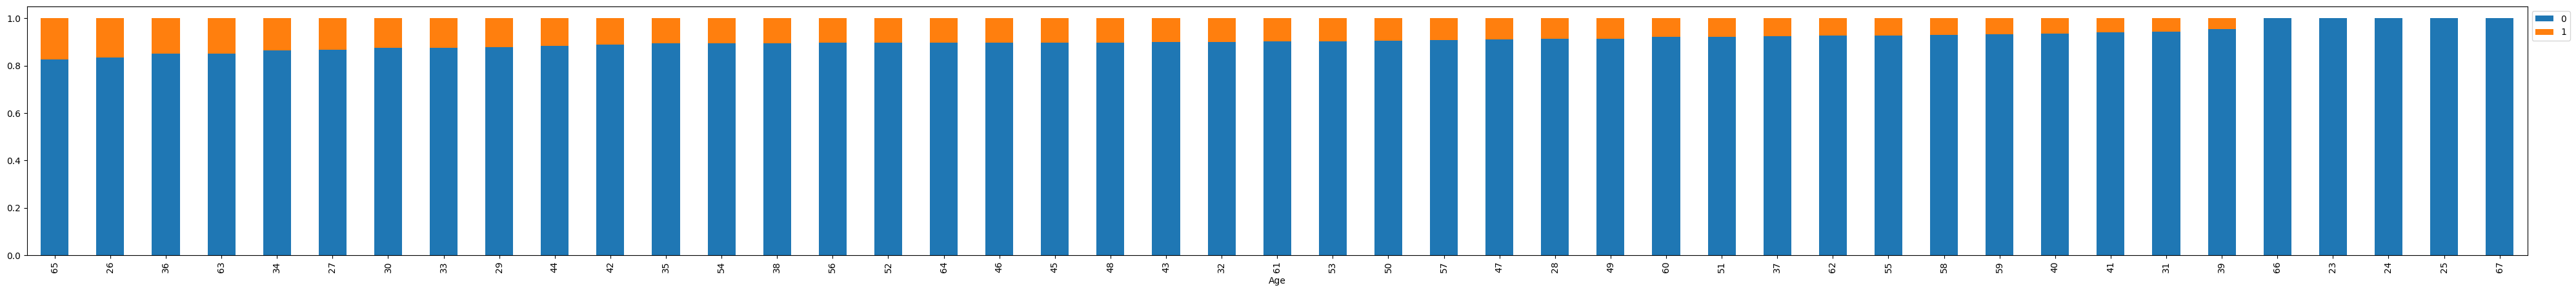

In [21]:
stacked_barplot(data, "Age", "Personal_Loan")

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [22]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


Observation:
There are no data that is missing in any column

In [23]:
#Feature engineering (if needed)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
1. All the column data is numerical values.
2. There are no categorical values, hence no need to create dummies or remove columns.
3. There is no null values, hence no need to replace any data with mean values.

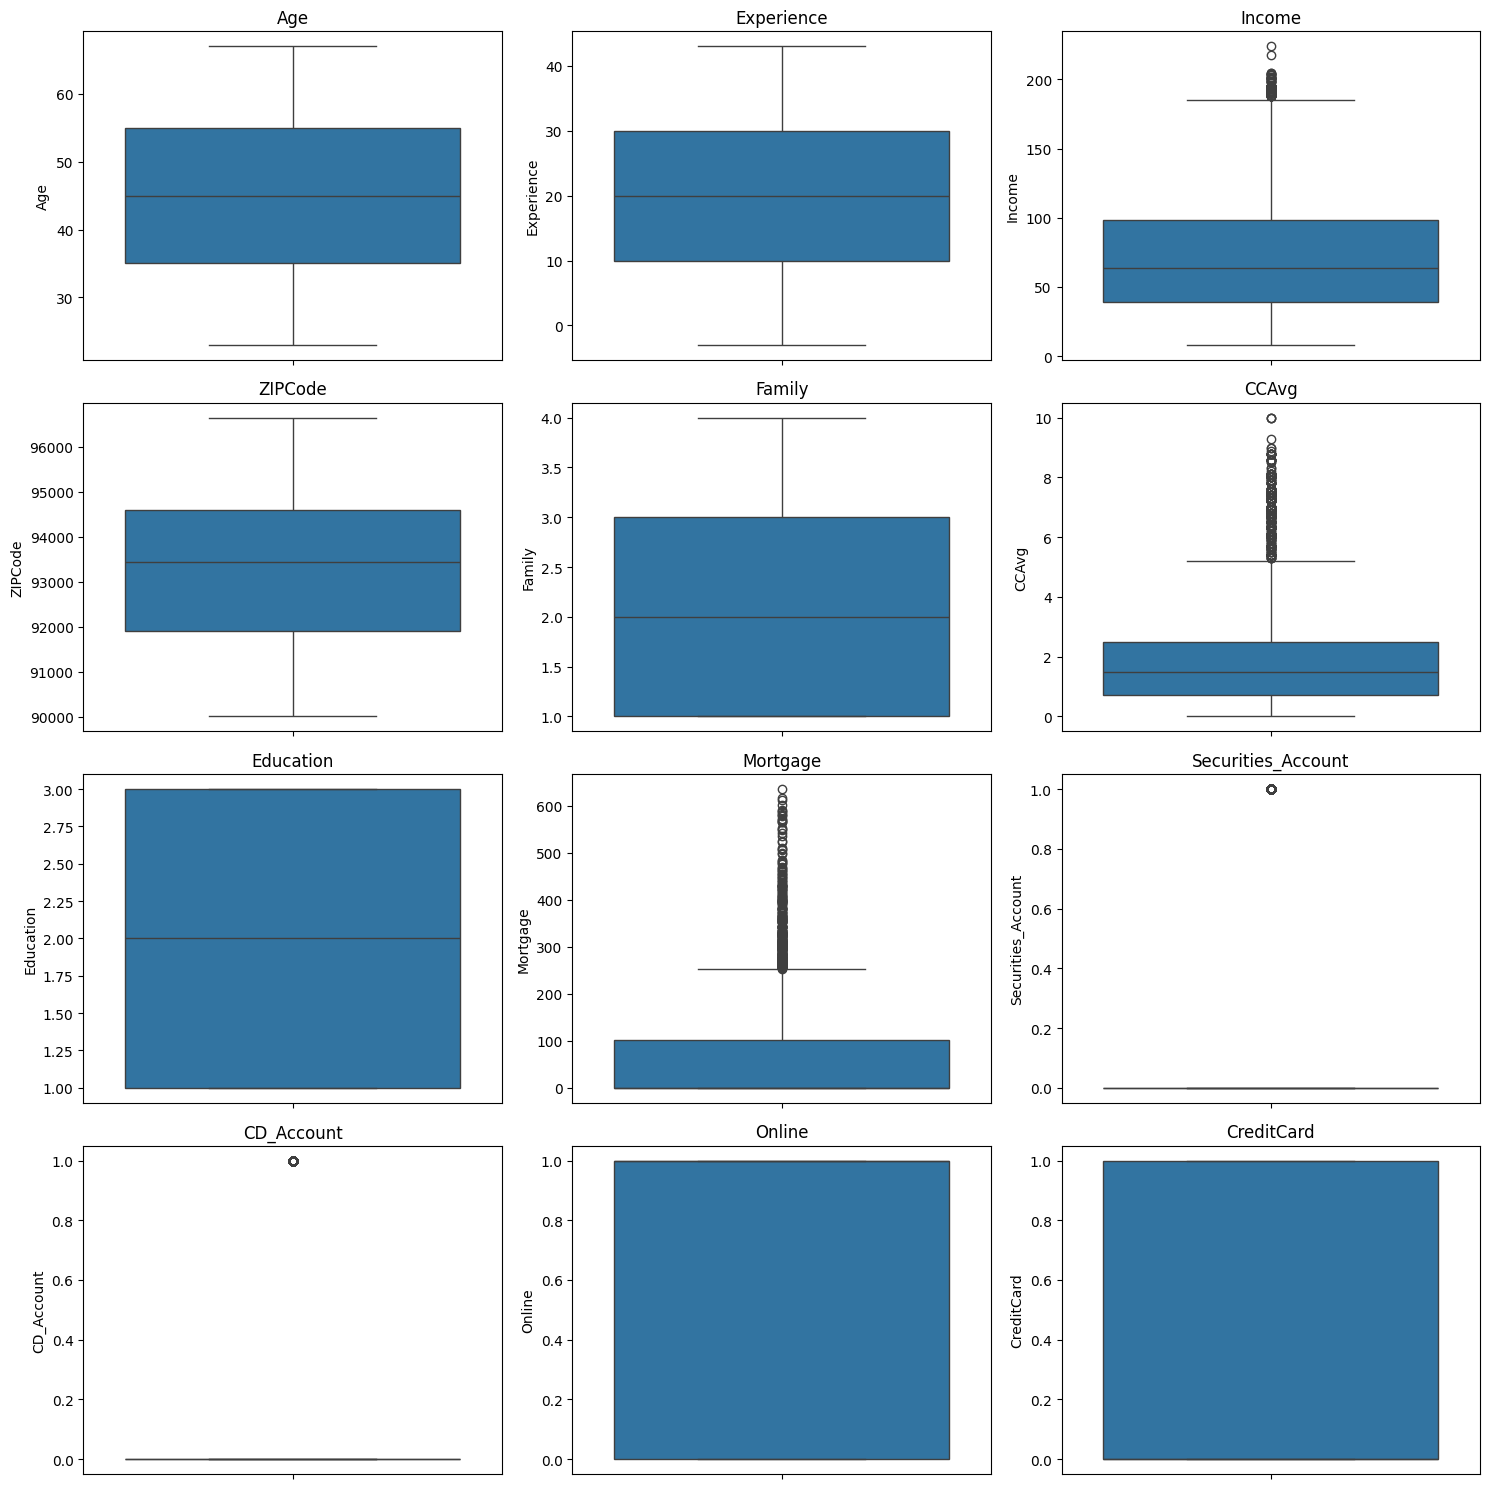

In [24]:
# prompt: create box plots for each column data in a 3 columned subplot

import matplotlib.pyplot as plt

# Create a figure with 3 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()
cols = [ 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage',  'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

# Iterate through the columns of the DataFrame and create a box plot for each
for i, column in enumerate(cols):
  sns.boxplot(y=data[column], ax=axes[i])
  axes[i].set_title(column)

# Remove any unused subplots
for i in range(len(cols), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Observations:
1. Only CCAvg, Securities_Account and Online have outliers.
2. Rest of the columns data is within the ranges.

In [25]:
# prompt: prepare data for modeling\

data.ID.nunique()


5000

In [26]:
#Since the customer IDs are unique values, they won't contribute to the model. Hence drop this column

data.drop('ID', axis=1, inplace=True)


In [27]:
#Dropping duplicated rows
data.duplicated().sum()

0

Observation:
There are no duplicated rows in the data.

In [88]:
# Prompt: Preparing data for modeling



# Separate the target variable from the features
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)




## Model Building

### Model Evaluation Criterion

# prompt: model evaluation criterion

Model can make wrong predictions as below:

False Negative: Predicting a customer won't purchase a loan when they actually will.
False Positive: Predicting a customer will purchase a loan when they actually will not.

Which case is more important:
If we predict that a customer will purchase a loan but they actually won't, then we will loose the campaign/marketing cost.
If we predict that a cusomter will not purchase a loan but they actually will, then we will miss the opportunity, which is expensice.
Loss of opportunity cost is much more than the loss of the campaign/marketing cost, hence reducing False Negative is important.

The bank would want the recall to be maximized, greater the recall score higher the chances of minimizing Falase Negatives.

In [89]:

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf



In [90]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

*


### Model Building

In [91]:
# prompt: import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [92]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

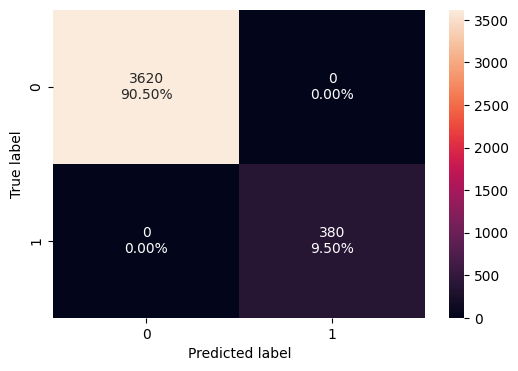

In [93]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [94]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


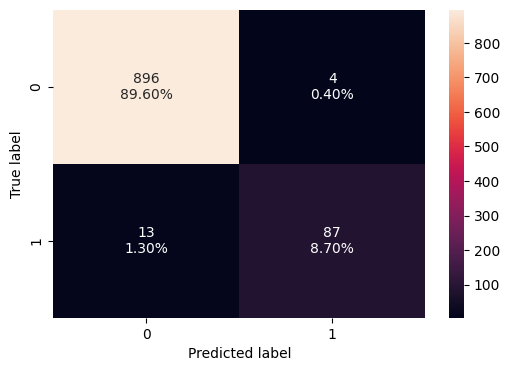

In [95]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [96]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.983,0.87,0.956044,0.910995


## Model Performance Improvement

In [97]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

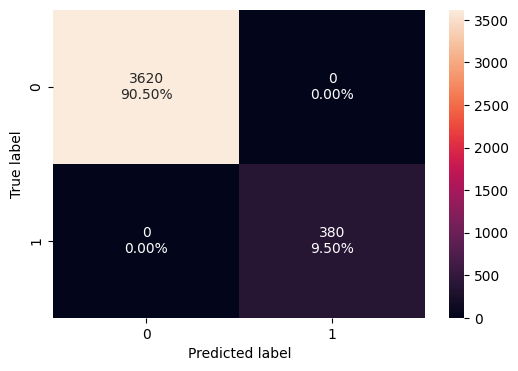

In [98]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [99]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


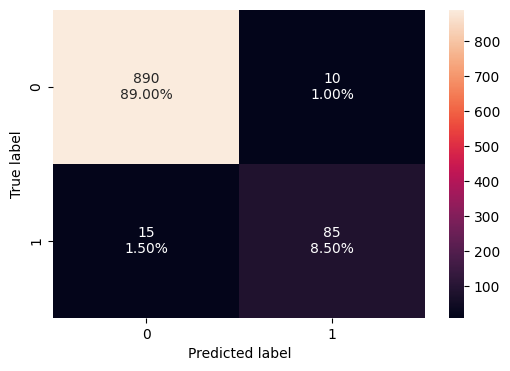

In [100]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [101]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.975,0.85,0.894737,0.871795


In [103]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(1, 9, 1)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            #print("max_depth:"+str(max_depth)+" max_leaf_node:"+str(max_leaf_nodes)+" min_samples_split:"+str(min_samples_split))

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=1
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)
            #print("train_recall_score:"+str(train_recall_score)+" test_recall_score:"+str(test_recall_score))
            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [104]:
model2 = best_estimator
# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

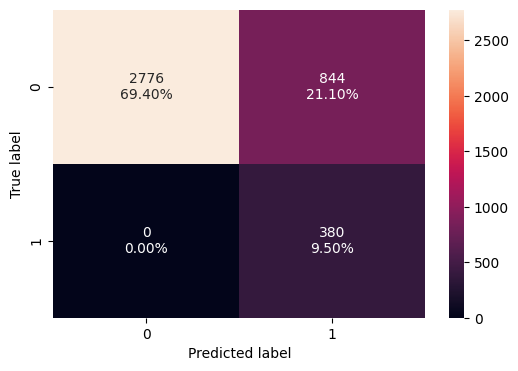

In [105]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [106]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.789,1.0,0.310458,0.473815


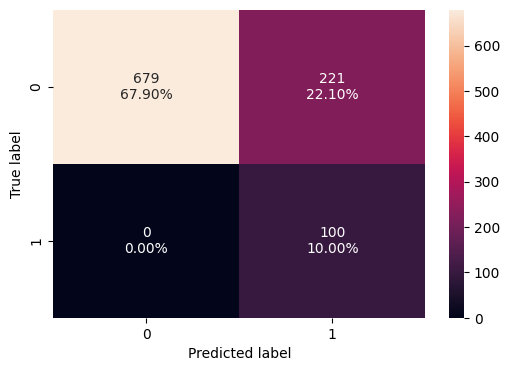

In [107]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [108]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779,1.0,0.311526,0.475059


In [110]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

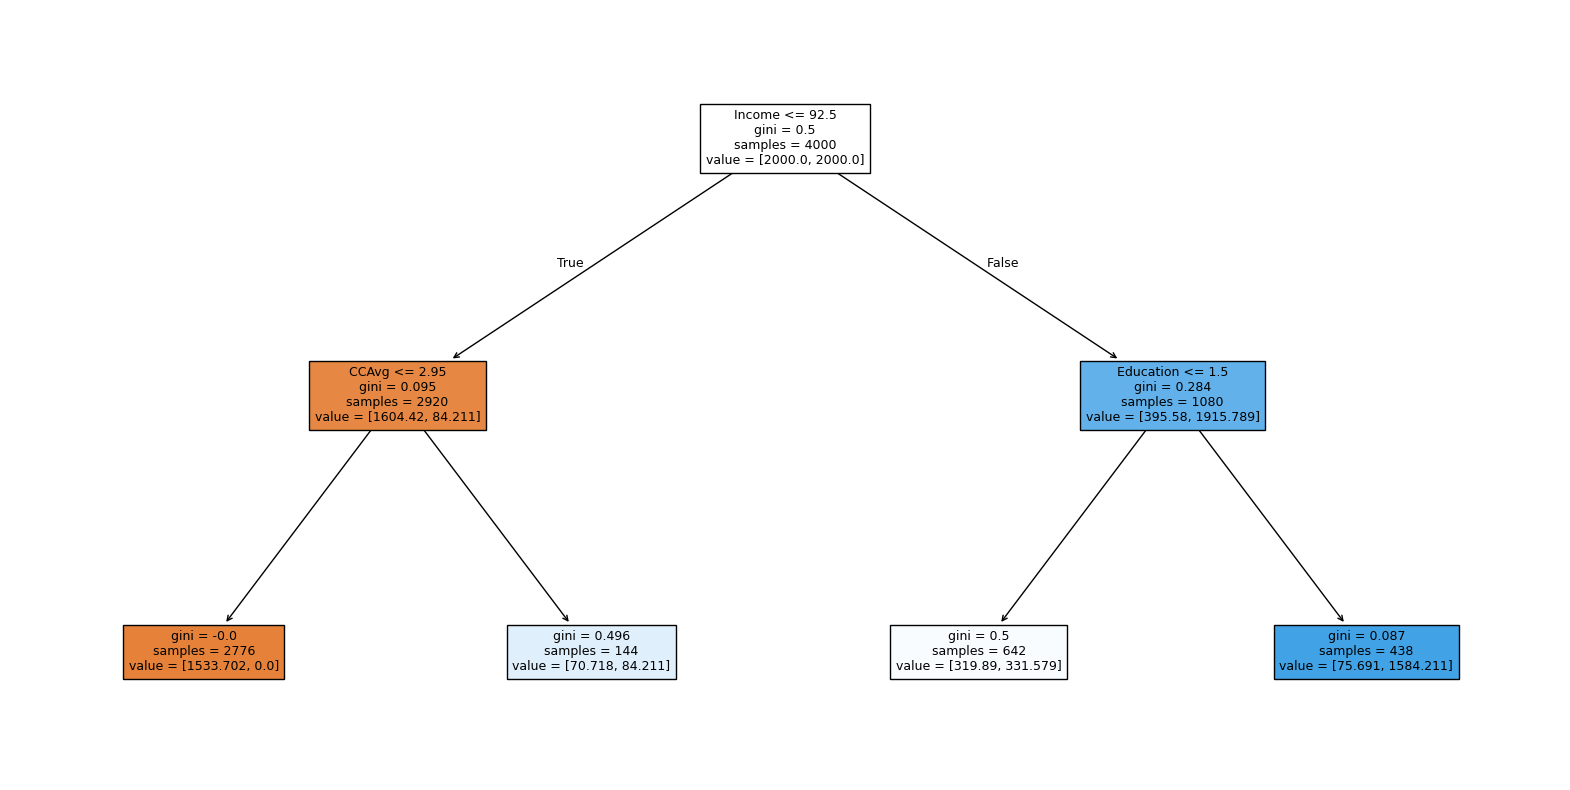

In [111]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [112]:
#importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.8150093 , 0.        , 0.        ,
       0.05722249, 0.12776821, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

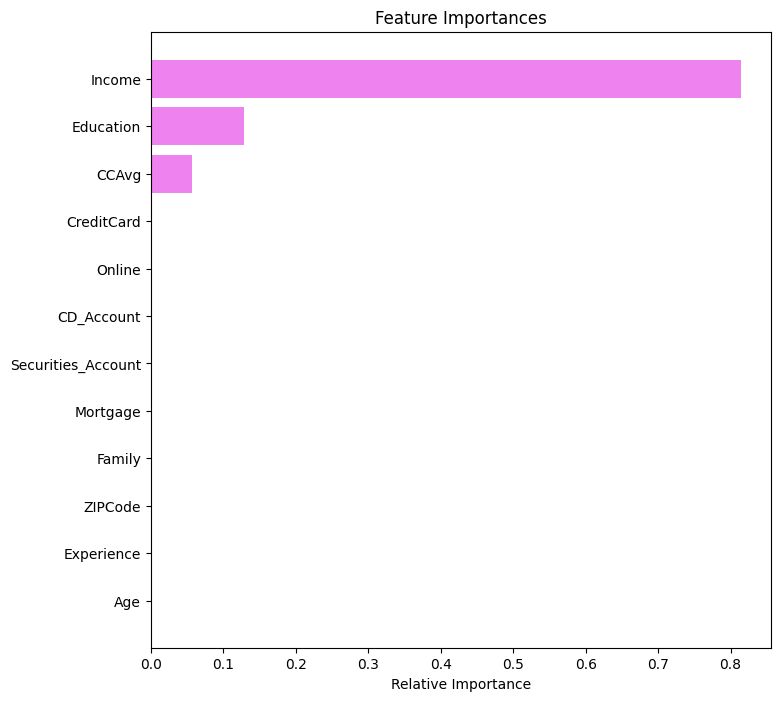

In [113]:
importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Decision Tree Post Pruning

In [116]:
clf = model2
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [117]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.136746
1,0.020786,0.157532
2,0.046412,0.203945
3,0.296055,0.500000


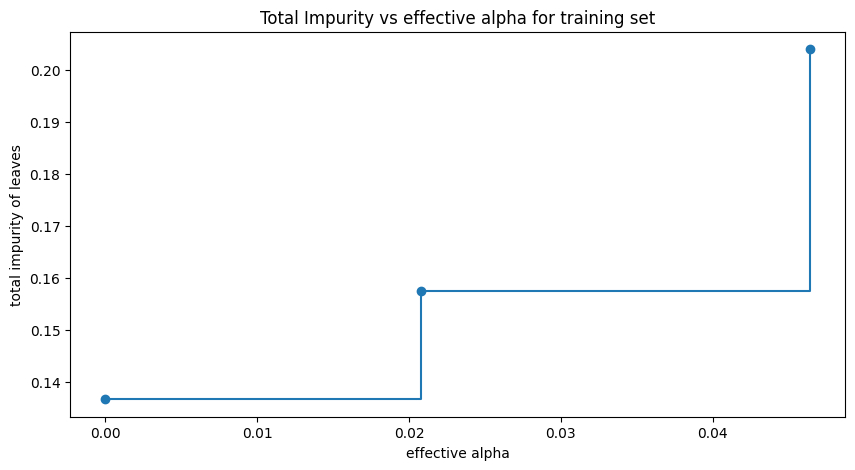

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [119]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2960552786490474


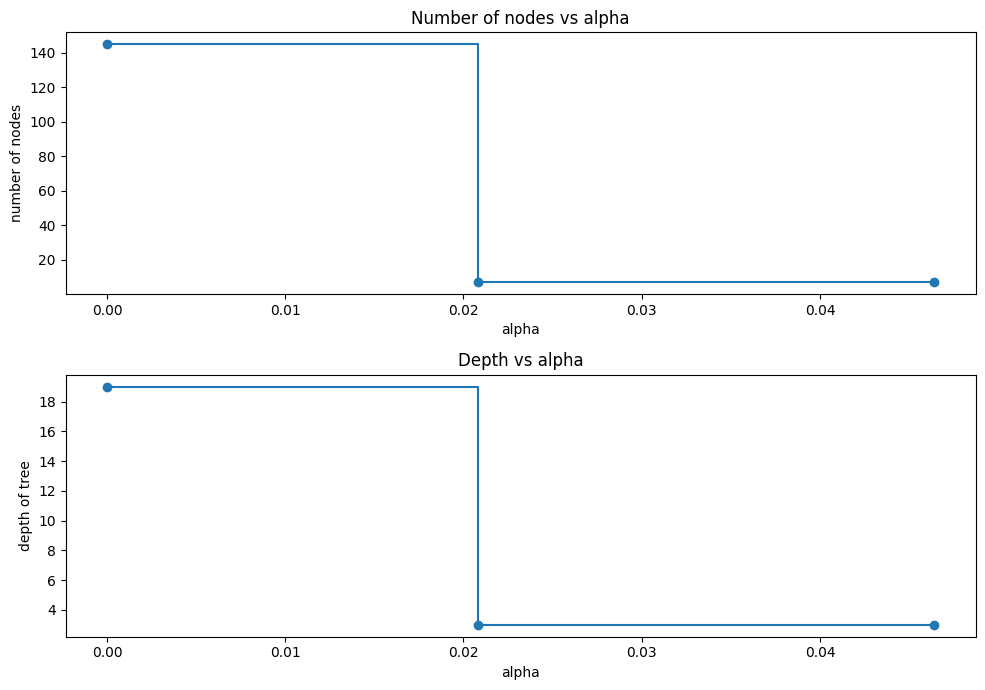

In [120]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [121]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [122]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [123]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

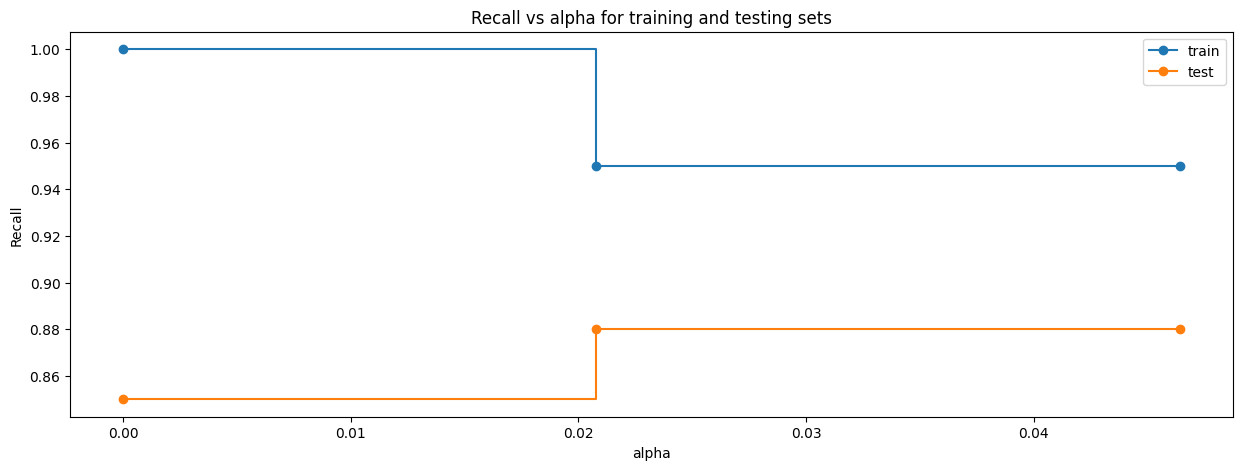

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [125]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.02078629118166564, class_weight='balanced',
                       random_state=1)


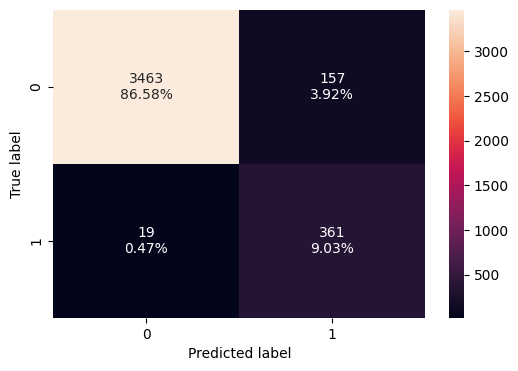

In [126]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [127]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956,0.95,0.696911,0.804009


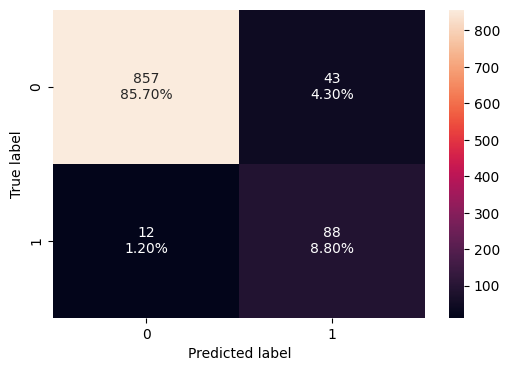

In [128]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [129]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.945,0.88,0.671756,0.761905


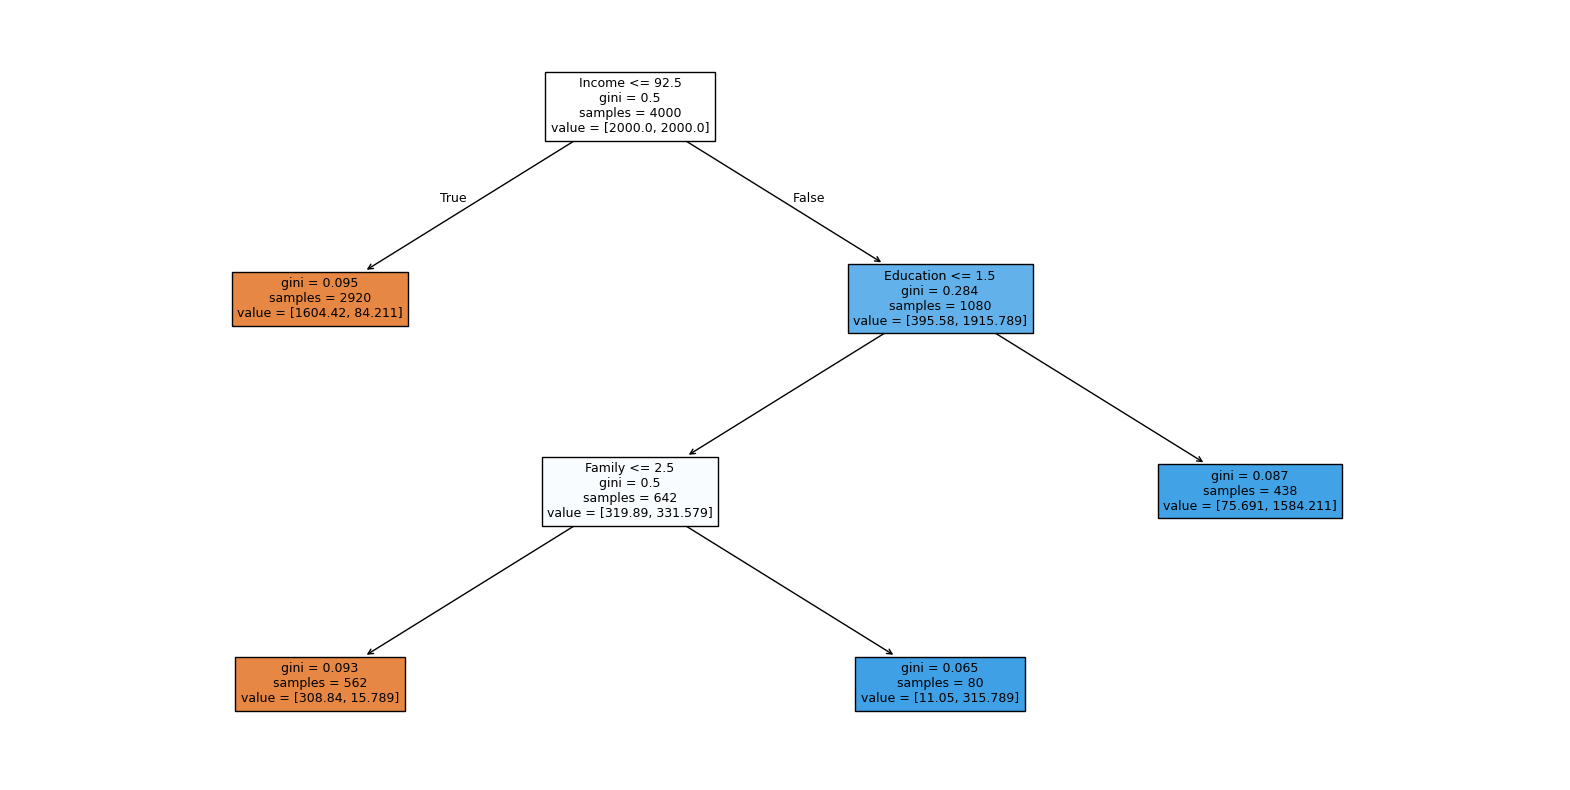

In [130]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
importances = model4.feature_importances_
indices = np.argsort(importances)

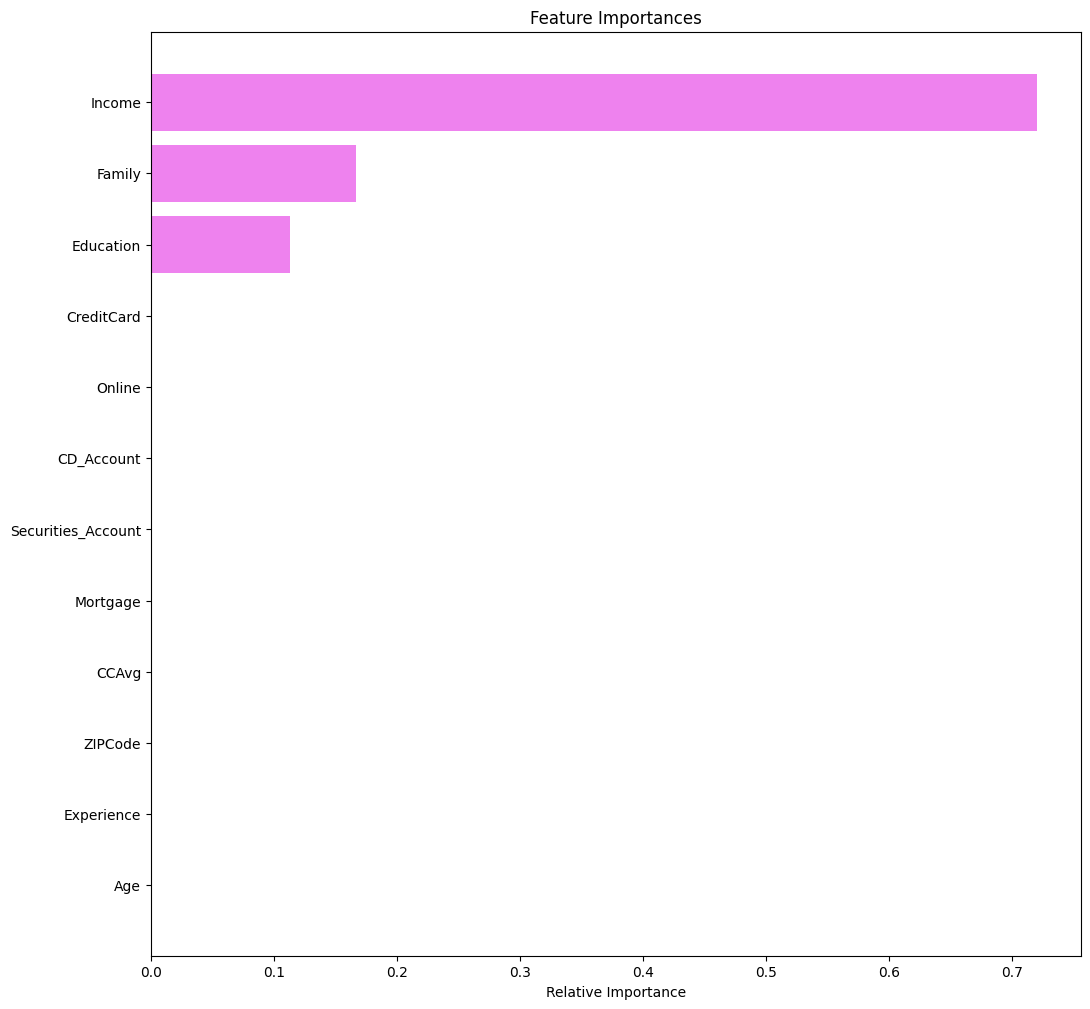

In [132]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [133]:
models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.789000,0.956000
Recall,1.0,1.0,1.000000,0.950000
Precision,1.0,1.0,0.310458,0.696911
F1,1.0,1.0,0.473815,0.804009


In [134]:
models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.983000,0.975000,0.779000,0.945000
Recall,0.870000,0.850000,1.000000,0.880000
Precision,0.956044,0.894737,0.311526,0.671756
F1,0.910995,0.871795,0.475059,0.761905


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___